In [1]:
%matplotlib inline
import numpy as np
from scipy.io import FortranFile
import matplotlib.pyplot as plt
import sys
sys.path.append('./actpols2')
import act_like
import camb

In [2]:
# We start by setting the directory containing the ACTPol likelihood data files.
data_dir = './actpols2/data/'
act = act_like.ACTPol_s2(data_dir)

In [3]:
# This is a test function provided in the likelihood code that basically just checks files can all be loaded OK.
act.test()

Expected: 147.747797921459
Found   : 147.747797921459


In [4]:
# Calculate a theoretical power spectrum from calling the CAMB code with a particular choice of parameters

# Changing these input parameters and rerunning this code block will produce different theory spectra that can be
# compared with the ACTPol data using the plotting blocks below

H0 = 67.5      # Hubble parameter in units of km/s/Mpc
ombh2 = 0.022  # physical baryon density
omch2 = 0.122  # physical cold dark matter density
tau=0.06       # optical depth to reionization
ns = 0.965     # spectral index of primordial scalar fluctuations
As = 2.5e-09   # amplitude of primordial scalar fluctuations

#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, mnu=0.06, omk=0, tau=tau)
pars.InitPower.set_params(ns=ns, r=0, As=As)
pars.set_for_lmax(6000, lens_potential_accuracy=2);

#calculate results for these parameters
results = camb.get_results(pars)

powers = results.get_cmb_power_spectra(pars)

totCL = powers['total']

In [5]:
# Evaluating the log-likelihood
# - need to be careful about ordering of Cl arrays - the ACTPol likelihood code expects TT, then TE, then EE
# - final parameter is a polarization angle nuisance parameter (see Louis et al. 2016, arXiv 1610.02360)
# - loglike() returns the negative log-likelihood, the factor of two converts to a chi-squared
print 2*act.loglike(totCL[2:6001,0]*1e12*2*np.pi, totCL[2:6001,3]*1e12*2*np.pi, totCL[2:6001,1]*1e12*2*np.pi, 0.98)

148.897856085


In [6]:
# Plot the ACTPol bandpowers and theory spectra

nbin = 132   # total number of bins across TT, TE and EE spectra
nbintt = 42  # multipoles 500-4000
nbinte = 45  # multipoles 250-4000
nbinee = 45  # multipoles 250-4000
like_file = data_dir + '/cl_cmb_aps2.dat'
bval, X_data, X_sig = np.genfromtxt(like_file, max_rows=nbin, delimiter = None, unpack=True)

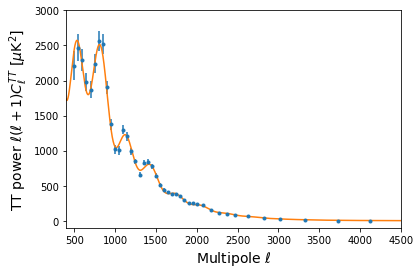

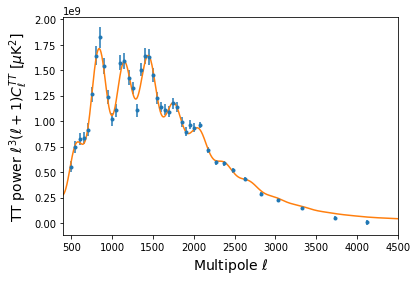

In [7]:
# Temperature (TT) power spectra

# showing l(l+1)Cl
plt.errorbar(bval[:nbintt], bval[:nbintt]*(bval[:nbintt]+1)*X_data[:nbintt]*0.5/np.pi, \
             bval[:nbintt]*(bval[:nbintt]+1)*X_sig[:nbintt]*0.5/np.pi, marker='.', ls='None')
plt.plot(np.arange(2,6001), totCL[2:6001,0]*1e12*2*np.pi)
plt.xlim([400, 4500])
plt.ylim([-100, 3000])
plt.xlabel(r'Multipole $\ell$', size=14)
plt.ylabel(r'TT power $\ell(\ell+1)C_{\ell}^{TT}$ [$\mu$K$^2$]', size=14)
plt.show()

# showing l^3(l+1)Cl to enchance damping tail
plt.errorbar(bval[:nbintt], bval[:nbintt]**3*(bval[:nbintt]+1)*X_data[:nbintt]*0.5/np.pi, \
             bval[:nbintt]**3*(bval[:nbintt]+1)*X_sig[:nbintt]*0.5/np.pi, marker='.', ls='None')
plt.plot(np.arange(2,6001), np.arange(2,6001)**2*totCL[2:6001,0]*1e12*2*np.pi)
plt.xlim([400, 4500])
#plt.ylim([-100, 3000])
plt.xlabel(r'Multipole $\ell$', size=14)
plt.ylabel(r'TT power $\ell^3(\ell+1)C_{\ell}^{TT}$ [$\mu$K$^2$]', size=14)
plt.show()

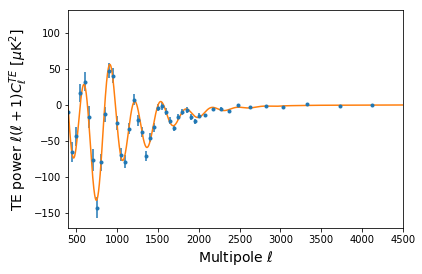

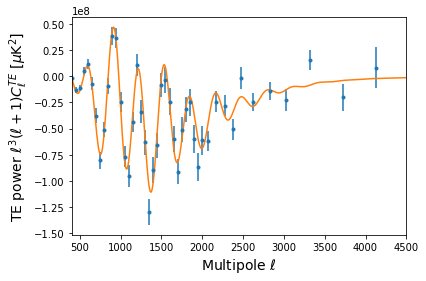

In [8]:
# Temperature-polarization (TE) cross-power spectra

# showing l(l+1)Cl
bins = np.arange(nbintt, nbintt+nbinte)
plt.errorbar(bval[bins], bval[bins]*(bval[bins]+1)*X_data[bins]*0.5/np.pi, \
             bval[bins]*(bval[bins]+1)*X_sig[bins]*0.5/np.pi, marker='.', ls='None')
plt.plot(np.arange(2,6001), totCL[2:6001,3]*1e12*2*np.pi)
plt.xlim([400, 4500])
#plt.ylim([-100, 3000])
plt.xlabel(r'Multipole $\ell$', size=14)
plt.ylabel(r'TE power $\ell(\ell+1)C_{\ell}^{TE}$ [$\mu$K$^2$]', size=14)
plt.show()

# showing l^3(l+1)Cl to enhance damping tail
plt.errorbar(bval[bins], bval[bins]**3*(bval[bins]+1)*X_data[bins]*0.5/np.pi, \
             bval[bins]**3*(bval[bins]+1)*X_sig[bins]*0.5/np.pi, marker='.', ls='None')
plt.plot(np.arange(2,6001), np.arange(2,6001)**2*totCL[2:6001,3]*1e12*2*np.pi)
plt.xlim([400, 4500])
#plt.ylim([-100, 3000])
plt.xlabel(r'Multipole $\ell$', size=14)
plt.ylabel(r'TE power $\ell^3(\ell+1)C_{\ell}^{TE}$ [$\mu$K$^2$]', size=14)
plt.show()

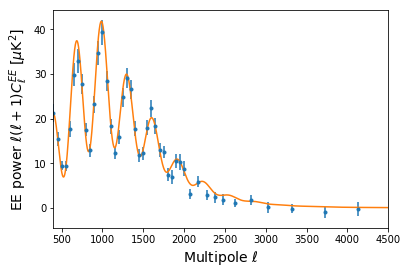

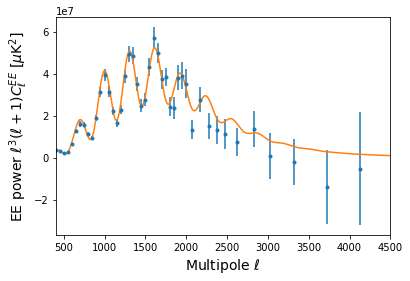

In [9]:
# E-mode polarization (EE) power spectra

# showing l(l+1)Cl
bins = np.arange(nbintt+nbinte, nbin)
plt.errorbar(bval[bins], bval[bins]*(bval[bins]+1)*X_data[bins]*0.5/np.pi, \
             bval[bins]*(bval[bins]+1)*X_sig[bins]*0.5/np.pi, marker='.', ls='None')
plt.plot(np.arange(2,6001), totCL[2:6001,1]*1e12*2*np.pi)
plt.xlim([400, 4500])
#plt.ylim([-100, 3000])
plt.xlabel(r'Multipole $\ell$', size=14)
plt.ylabel(r'EE power $\ell(\ell+1)C_{\ell}^{EE}$ [$\mu$K$^2$]', size=14)
plt.show()

# showing l^3(l+1)Cl to enhance damping tail
plt.errorbar(bval[bins], bval[bins]**3*(bval[bins]+1)*X_data[bins]*0.5/np.pi, \
             bval[bins]**3*(bval[bins]+1)*X_sig[bins]*0.5/np.pi, marker='.', ls='None')
plt.plot(np.arange(2,6001), np.arange(2,6001)**2*totCL[2:6001,1]*1e12*2*np.pi)
plt.xlim([400, 4500])
#plt.ylim([-100, 3000])
plt.xlabel(r'Multipole $\ell$', size=14)
plt.ylabel(r'EE power $\ell^3(\ell+1)C_{\ell}^{EE}$ [$\mu$K$^2$]', size=14)
plt.show()

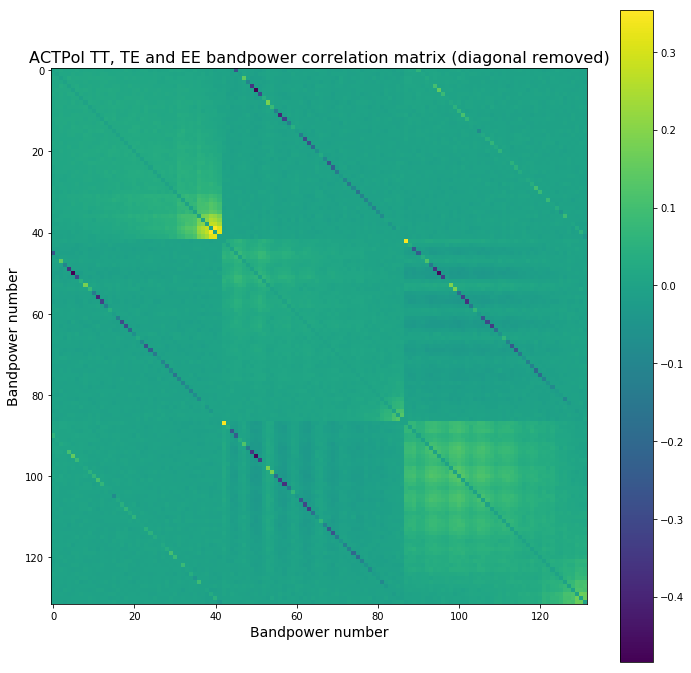

In [10]:
# Visualizing the ACTPol TT-TE-EE bandpower covariance matrix

# The off-diagonal structure here is due to sample variance, mode-coupling from masking and correlated foreground
# errors.

# load ACTPol bandpower covariance matrix
nbin = 132
cov_file = data_dir + '/c_matrix_actpol.dat'
f = FortranFile(cov_file, 'r')
covmat = f.read_reals(dtype=float).reshape((nbin,nbin))
for i_index in range(nbin):
    for j_index in range(i_index, nbin):
        covmat[i_index,j_index] = covmat[j_index,i_index]

# convert from covariance to correlation matrix so we can see off-diagonal structure more easily
temp = np.diag(1/np.sqrt(np.diag(covmat)))
corrmat = np.dot(temp, np.dot(covmat, temp))

# show correlation matrix with the diagonal removed - note the 3x3 block structure for the TT, TE and EE spectra
fig = plt.figure(figsize=(12,12))
plt.imshow(corrmat-np.eye(nbin), interpolation='Nearest')
plt.colorbar()
plt.xlabel("Bandpower number", size=14)
plt.ylabel("Bandpower number", size=14)
plt.title("ACTPol TT, TE and EE bandpower correlation matrix (diagonal removed)", size=16)
plt.show()